# Deep Learning für Visual Computing: Übungsblatt 04


**Von: Maximilian Mundt, Radmehr Nouri Inanlou**

**Abgabe: 11.05.2022**

## Importe

In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np

from torch.utils.data import DataLoader

from visualize import show_synthetic_data, show_loss_curve, show_decision_boundary
from handout import CircelsDataset, BinaryClassifierMLP, evaluate, train_binary

## a) Dataset und Dataloader

Vervollständigen Sie die Klasse ``CirclesDataset`` in ``handout.py`` die das Interface eines
map-style dataset implementiert.

*siehe handout.py*

Erstellen Sie ein ``CirclesDataset`` Instanz mit 10000 Elementen und verwenden Sie die
``DataLoader`` Klasse, um über den Datensatz in Batches der Größe 64 zu iterieren.

In [2]:
dataset = CircelsDataset()
dataloader = DataLoader(dataset, batch_size=64)

for points, labels in dataloader:
    pass

Visualisieren Sie den vollständigen Datensatz.

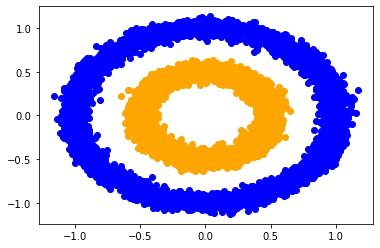

In [3]:
show_synthetic_data(dataset.points, dataset.labels)

Erläutern Sie, was in der Standard Einstellung mit dem letzten Batch des Datensatz passiert.

*Wenn am Ende nicht mehr genug Daten vorhanden sind, um ein Batch mit z.B. 64 Elementen zu füllen, dann wird dieses Batch mit den verbleibenden Elementen gefüllt. Hier sind dies 16.*

## b) Grundlagen MLP und Aktivierungsfunktionen

In [30]:
model = BinaryClassifierMLP(2, [4, 4], torch.nn.ReLU)
criterion = torch.nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters())

loss_history = train_binary(
    model=model,
    dataloader=dataloader,
    epochs=50,
    optim=optimizer,
)


Finished Training


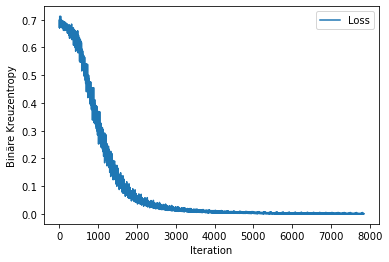

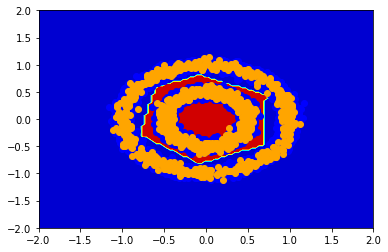

In [31]:
show_loss_curve(loss_history)
show_decision_boundary(model, dataset.points, dataset.labels)